# Project: No-show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project we will work on a datasets related to clinic appointments and we will see whether patients tends to show up or not. We will have to explore and look for some answers to questions such how many of the patients attend and how many don't show up? We will also have to check all the factors we have and try to figure out each of their effect on the show status and then combine some of them to see if combined factors may affect the show status in a different way.

### Analysis Question: Which factors are the most important in order to predict if patients will show up to their appointments? Which factor has negative effect on the show status?

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### Assessing Data

In [5]:
df= pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.info() #checking information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Here we found that we have 110527 rows and 14 columns. We also can see that we have no NULL values.

In [6]:
df.head()
df['No-show'].head()[0]
#investigating what type of data are in the 'No-show'

'No'

Now we can see that the No-show column contains string type data.

In [7]:
df.duplicated().sum() #zero duplicates

0

We have no identical duplications

In [8]:
df.PatientId.duplicated().sum()

48228

we can see that we have 48228 patient IDs that are duplicated

In [9]:
df.PatientId.nunique()

62299

As expected, we have 62299 unique patient IDs

In [10]:
df.duplicated(['PatientId', 'No-show']).sum()

38710

Here we can discover that not all duplicated Patient IDs has the same show or no show case.\n 
only 38710 Patient IDs has the same show or no show cases and we will remove them in the cleaning stage.

In [11]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From These information here we can see that the mean age is around 37, minimum age is "-1" which is a wrong data and we will remove it in the cleaning process, the maximum age is 115 and 50% af patients are between 17 - 50 years old. Also we can see that majority of patients received SMS. And finally, majority of patients don't have chronic diseases, being Alcoholic, with special needs, or have scholarship.

In [12]:
# checking how many age value are less than 1
df.query(" Age < 1 ")

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,1.473952e+14,5702537,F,2016-05-16T12:30:58Z,2016-06-01T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110346,5.577525e+12,5777724,M,2016-06-06T14:22:34Z,2016-06-08T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110454,6.142460e+11,5772400,F,2016-06-03T15:18:44Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110460,4.321846e+13,5769545,F,2016-06-03T08:56:51Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No


we have 3540 rows that have age values of -1 and 0

### Data Cleaning

In [13]:
# renaming columns
df.rename(columns= { 'No-show' : 'No_show', 'Hipertension' : 'Hypertension'}, inplace= True)
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No_show'],
      dtype='object')

Now we just renamed tha 'No-show' column to 'No_show' columns to make it esier for us to use it, and we fixed the typo in 'Hypertension' column's name.

In [14]:
# identifying the rows indexes of the 0 & -1 age values
wrong_age = df.query(" Age < 1 ").index

for i in wrong_age :
    df.drop( index= i, inplace= True)

df.describe() #making sure it worked well

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.069870e+05,1.069870e+05,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000
mean,1.472814e+14,5.675434e+06,38.316085,0.101031,0.203772,0.074243,0.031406,0.022975,0.323264
std,2.558267e+14,7.133274e+04,22.466214,0.301371,0.402804,0.262167,0.174412,0.164115,0.467725
min,3.921784e+04,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.173523e+12,5.640490e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.172463e+13,5.680744e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.433600e+13,5.725634e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In the previous step we have removed all the values for ages less than 1 year

In [15]:
# droppping duplicated patients Ids with the same show status
df.drop_duplicates(['PatientId', 'No_show'], inplace= True)
df.shape

(69454, 14)

In [16]:
# dropping unnecessary columns
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis= 1, inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69454 entries, 0 to 110524
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gender         69454 non-null  object
 1   Age            69454 non-null  int64 
 2   Neighbourhood  69454 non-null  object
 3   Scholarship    69454 non-null  int64 
 4   Hypertension   69454 non-null  int64 
 5   Diabetes       69454 non-null  int64 
 6   Alcoholism     69454 non-null  int64 
 7   Handcap        69454 non-null  int64 
 8   SMS_received   69454 non-null  int64 
 9   No_show        69454 non-null  object
dtypes: int64(7), object(3)
memory usage: 5.8+ MB


In [17]:
df.describe

<bound method NDFrame.describe of        Gender  Age      Neighbourhood  Scholarship  Hypertension  Diabetes  \
0           F   62    JARDIM DA PENHA            0             1         0   
1           M   56    JARDIM DA PENHA            0             0         0   
2           F   62      MATA DA PRAIA            0             0         0   
3           F    8  PONTAL DE CAMBURI            0             0         0   
4           F   56    JARDIM DA PENHA            0             1         1   
...       ...  ...                ...          ...           ...       ...   
110518      F   50        MARIA ORTIZ            0             0         0   
110520      F   42        MARIA ORTIZ            0             0         0   
110521      F   53        MARIA ORTIZ            0             0         0   
110522      F   56        MARIA ORTIZ            0             0         0   
110524      F   21        MARIA ORTIZ            0             0         0   

        Alcoholism  Handcap  

### Data Wrangling Summary
Now we have an enough knowledge about the data we are dealing with when it comes to number of rows and columns, the kind of data, mean value for each column, how many duplicates, unique values and if we had wrong data or nulls. Then we cleaned the data like dropping wrong data as ages of 0 or -1, renamed few columns, dropped duplicates and dropped unnecessary data.

<a id='eda'></a>
## Exploratory Data Analysis
Now that we have assessed and cleaned the data, we will have to find some statstics and do some visualization to answer some questions.
### General Idea

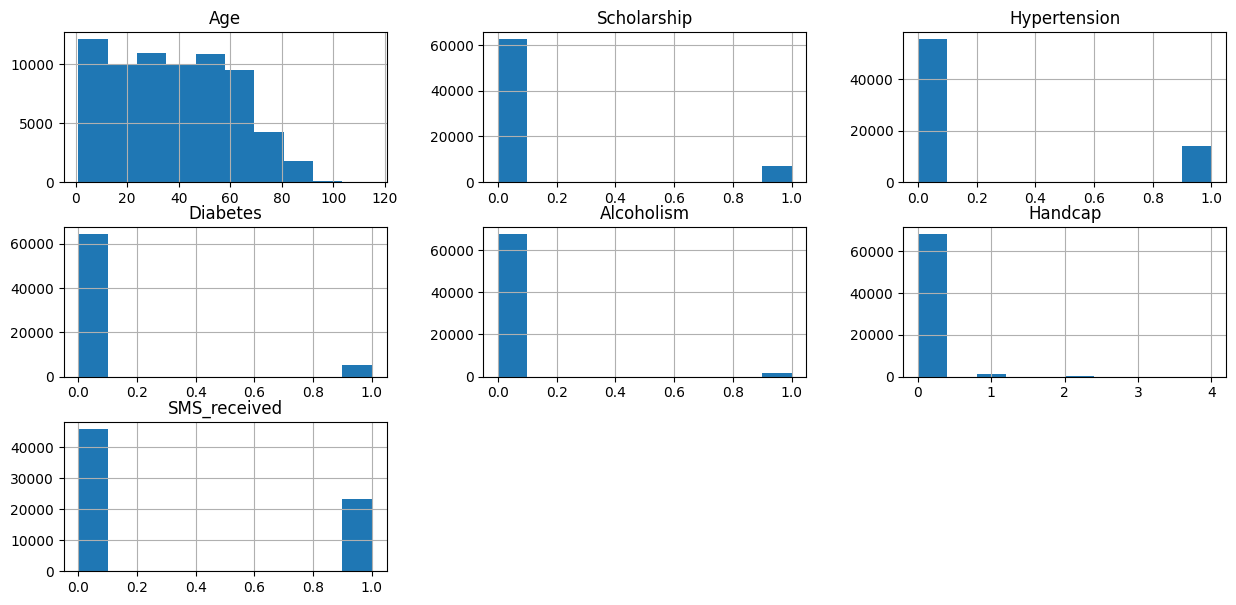

In [18]:
df.hist(figsize= (15,7));

In [39]:
# spliting the patients into 2 groups depending on their show status
# 5. Convert no_show column from yes/no to 1/0
df.No_show = df.No_show.map(dict(Yes=1, No=0))

p_show= df.query("No_show == 0")
p_no_show= df.query("No_show == 1")

p_show.count(), p_no_show.count()

(Gender           52360
 Age              52360
 Neighbourhood    52360
 Scholarship      52360
 Hypertension     52360
 Diabetes         52360
 Alcoholism       52360
 Handcap          52360
 SMS_received     52360
 No_show          52360
 dtype: int64,
 Gender           17094
 Age              17094
 Neighbourhood    17094
 Scholarship      17094
 Hypertension     17094
 Diabetes         17094
 Alcoholism       17094
 Handcap          17094
 SMS_received     17094
 No_show          17094
 dtype: int64)

In [101]:
#checking the mean values for each group
p_show.mean(numeric_only=True), p_no_show.mean(numeric_only=True)

(Age             38.504698
 Scholarship      0.093908
 Hypertension     0.209893
 Diabetes         0.075363
 Alcoholism       0.024408
 Handcap          0.021600
 SMS_received     0.298854
 No_show          0.000000
 dtype: float64,
 Age             35.520768
 Scholarship      0.111618
 Hypertension     0.176612
 Diabetes         0.067275
 Alcoholism       0.030420
 Handcap          0.018369
 SMS_received     0.456944
 No_show          1.000000
 dtype: float64)

we can see that the mean age is 38 for patients who showed up and 35 for patients who didn't show up. Also the the patients who didn't show up received SMS more than the patients who showed up, that means the SMS is not effective and needs to be improved.

### Investigating the effect of some factors on the show status.

How old are most of the patients?

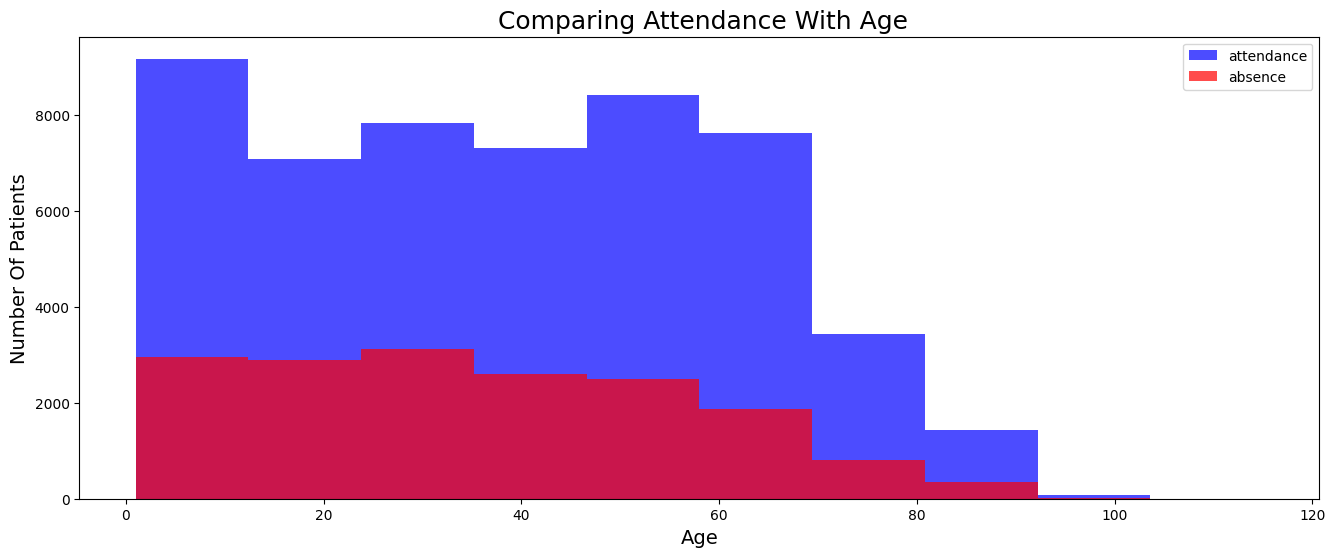

In [102]:
#defining a function to check different factors affecting the show status

def show_status(p_show, p_no_show, factor_, kind_): # # factor_ variable should be the name of the column in string format
   
    plt.figure(figsize=[16,6])

    p_show[factor_].plot(kind= kind_ ,alpha= .7, color= 'blue', label= 'attendance')
    p_no_show[factor_].plot(kind= kind_ ,alpha= .7, color= 'red', label= 'absence')
    
    plt.title(' Comparing Attendance With {}'.format(factor_), size= 18)
    plt.xlabel(factor_, size= 14)
    plt.ylabel('Number Of Patients', size= 14)
    plt.legend();

show_status(p_show, p_no_show,'Age', 'hist')




We can see most of the patients are from 1-12 then from aroud 47-58. The least number of patients are above 80 years old.

what is the average age of the highest and lowest no show patients?

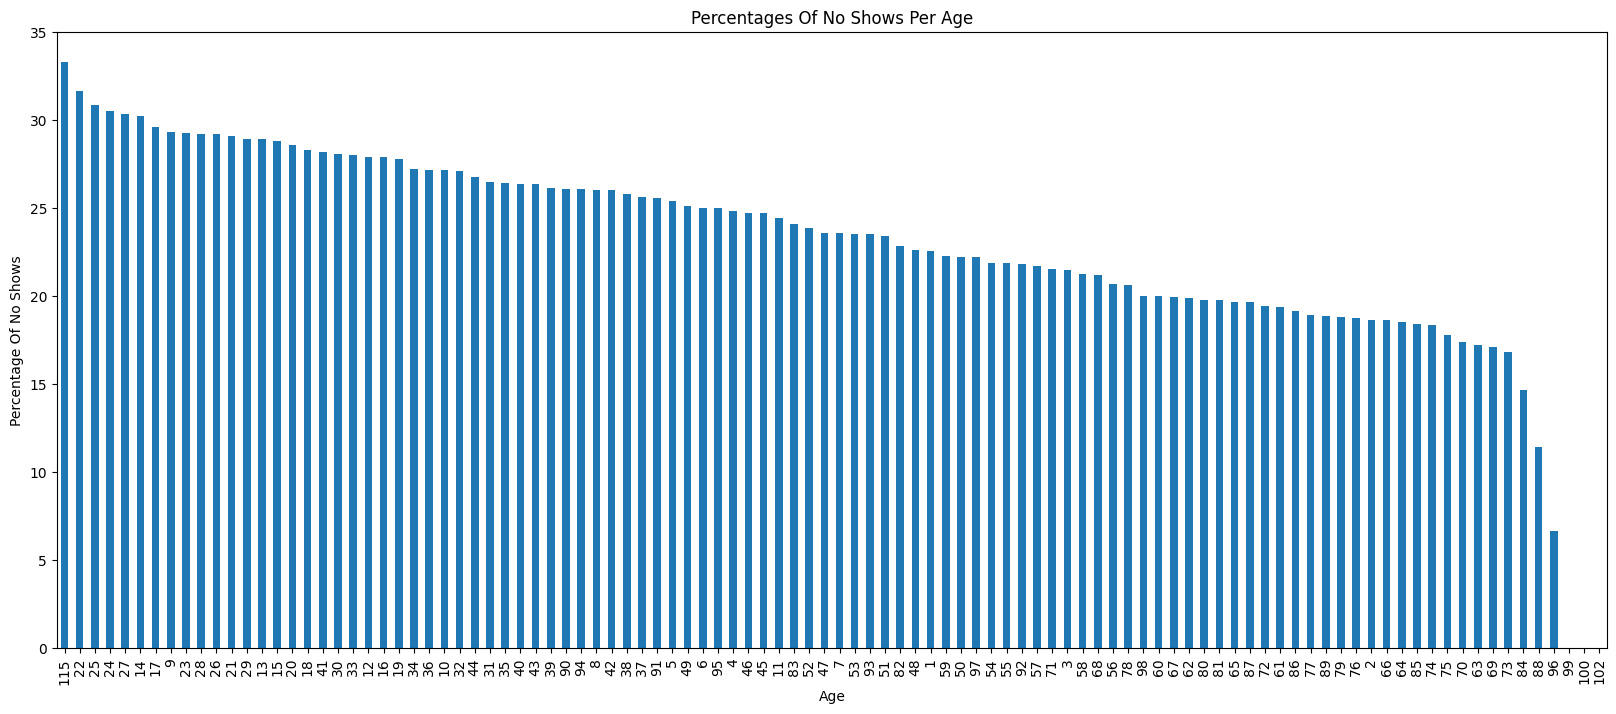

In [126]:
ages_no_show = p_no_show.groupby(['Age']).count()['No_show']
ages_ = df.groupby(['Age']).count()['No_show']
ages_show = p_show.groupby(['Age']).count()['No_show']

percentages_no_show = ages_no_show/ages_*100
percentages_no_show.sort_values()

# Plotting percentages of no_shows per ages
percentages_no_show.sort_values(ascending=False).plot(kind='bar', title='Percentages of No shows per Age'.title(), figsize=(20,8));
plt.ylabel('Percentage of no_shows'.title().replace("_"," "))
plt.xlabel('Age'.title());

The highest percentage of no show are ages of 115, and lowest are ages of 96.

Does gender affect the attendance?

In [127]:
def mean_factor(df, grpVar, yVar=None, color='steelblue',title=None, ylabel=None, rotation=None, figsize=(14,6), alpha=0.7):
    '''base function for groupby plotting of dependent variables to no_show column'''
    # plotting
    df.groupby([grpVar])[yVar].mean().plot.bar(edgecolor='black', figsize=figsize, rot=0, width=0.6, color=color, alpha=alpha)
    plt.title(f' {yVar} by {grpVar}'.title(), fontsize = 14, weight = "bold")
    plt.xlabel(f'{grpVar}'.title(), fontsize =10, weight = "bold")
    plt.ylabel(f'{yVar} in Percentages'.title(), fontsize = 8, weight='bold')
    plt.xticks(rotation=rotation)
    plt.grid(axis='y')
    plt.legend()

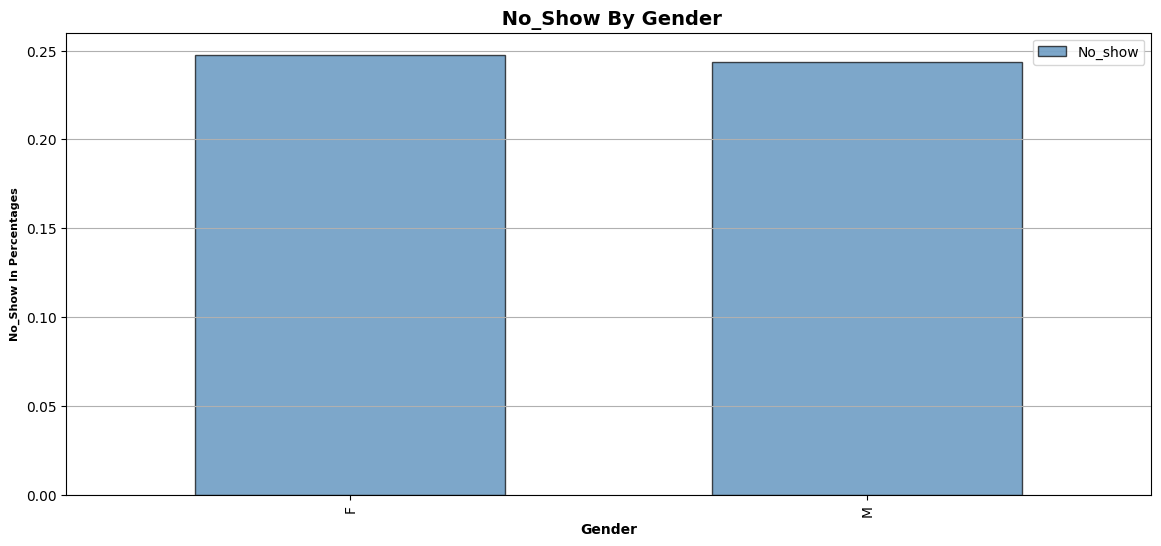

In [132]:
mean_factor(df, 'Gender', 'No_show')

Gender has no effect on show status.

Do patients who received SMS are more likely to show up?

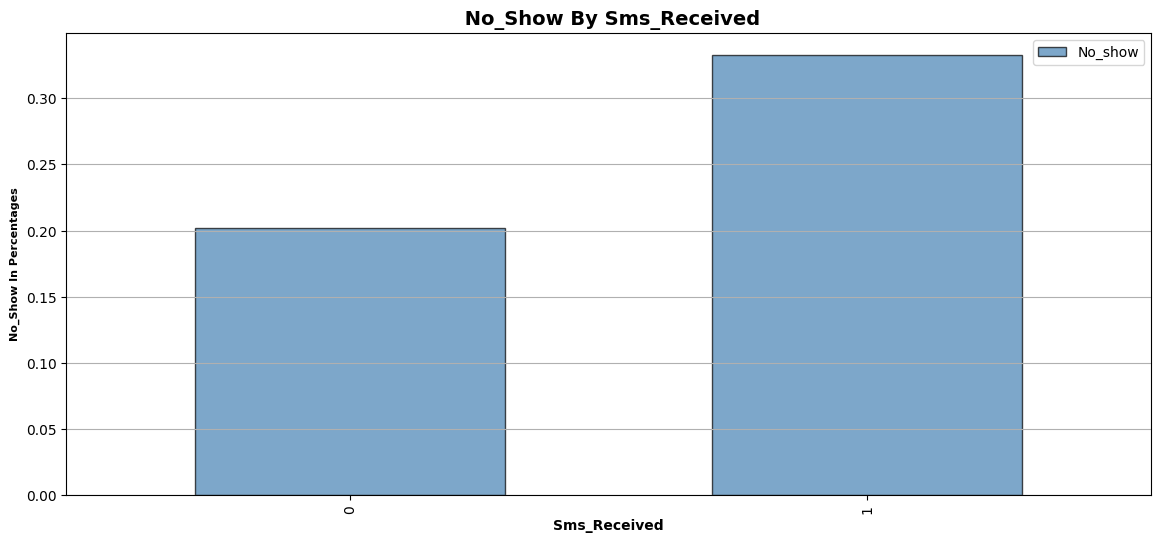

In [135]:
mean_factor(df, 'SMS_received', 'No_show')

Patients who received SMS and didn't show up are more than patients who didn't receive SMS. SMS service needs to be fixed

what's the average age of patients with diabetes? and do they are more likely to not show up?

In [106]:
def mean_2_factors(show_df, noshow_df, grpVar, yVar=None, color_1='blue', color_2='red',title=None, ylabel=None, rotation=None, figsize=(14,6), alpha=0.7):
    '''base function for groupby plotting of dependent variables to no_show column'''
    # plotting
    show_df.groupby([grpVar])[yVar].mean().plot.bar(edgecolor='black', figsize=figsize, rot=0, width=0.6, color=color_1, alpha=alpha, label= 'show')
    noshow_df.groupby([grpVar])[yVar].mean().plot.bar(edgecolor='black', figsize=figsize, rot=0, width=0.6, color=color_2, alpha=alpha, label= 'no show')
    plt.title(f' Show Status by {yVar} & {grpVar}'.title(), fontsize = 14, weight = "bold")
    plt.xlabel(f'{grpVar}'.title(), fontsize =10, weight = "bold")
    plt.ylabel(f'Mean {yVar}'.title(), fontsize = 8, weight='bold')
    plt.xticks(rotation=90)
    plt.grid(axis='y')
    plt.legend()
    plt.show()

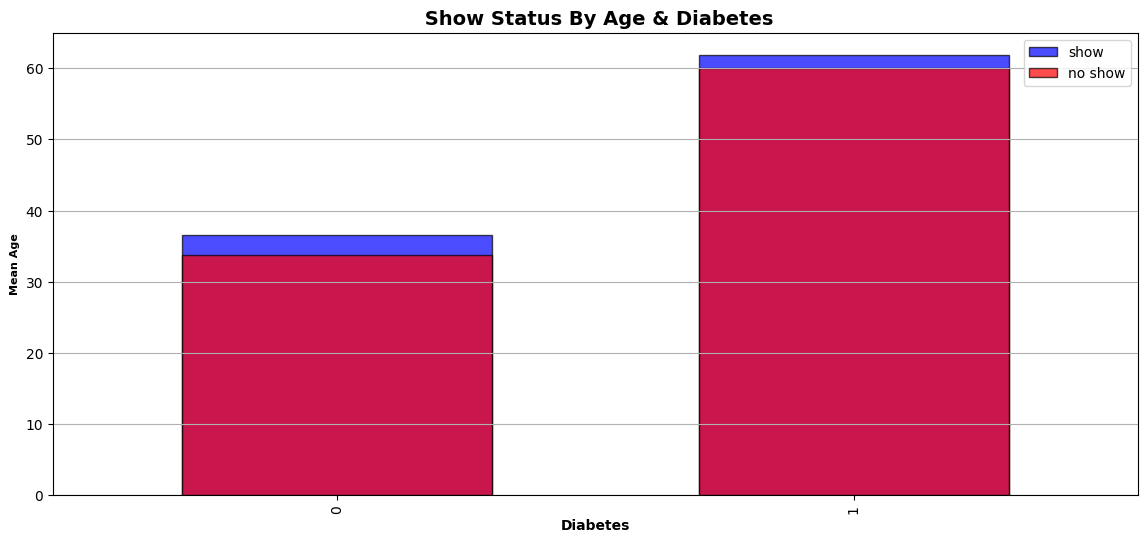

In [136]:
#checking the relation between attendance and the age of patients who have Diabetes
mean_2_factors(p_show, p_no_show, 'Diabetes', 'Age')

Here we can observe that patients without diabetes have average age of 35 and most of them don't show up, and patients with diabetes have average age of 60 and most of them don't show up.

what's the average age of patients with hypertension? and do they are more likely to not show up?

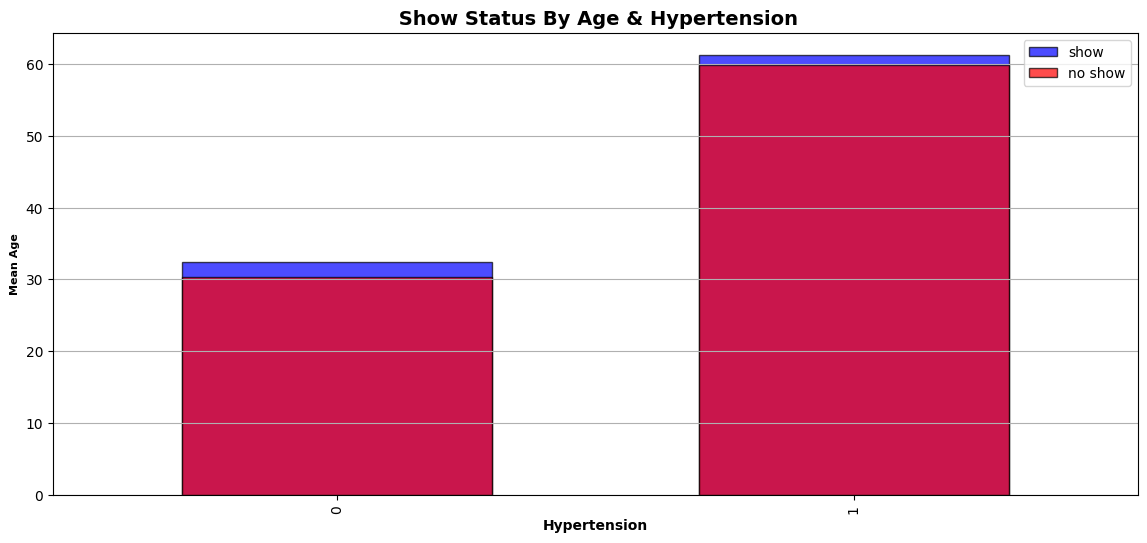

In [109]:
#checking the relation between attendance and the age of patients who have Diabetes
mean_2_factors(p_show, p_no_show, 'Hypertension', 'Age')

Here we can observe that patients without Hypertension have average age of 30 and most of them don't show up, and patients with diabetes have average age of 60 and most of them don't show up.

Does the neibhbourhoods affect the no show status?

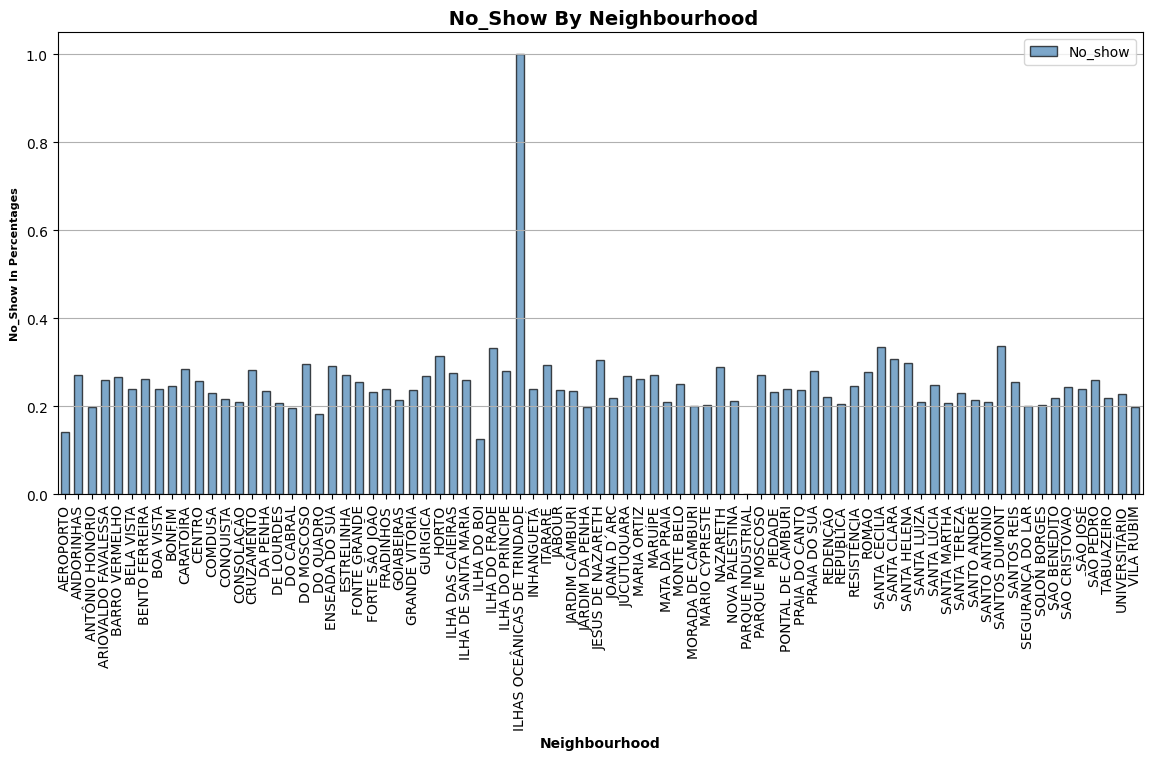

In [141]:
mean_factor(df, 'Neighbourhood', 'No_show')

ILHAS OCEANICAS DE TRINDADE has the highest no show status, while PARQUE INDUSTRIAL has the lowest no show status.

Do patients' responses to SMS vary in different neighbourhoods?

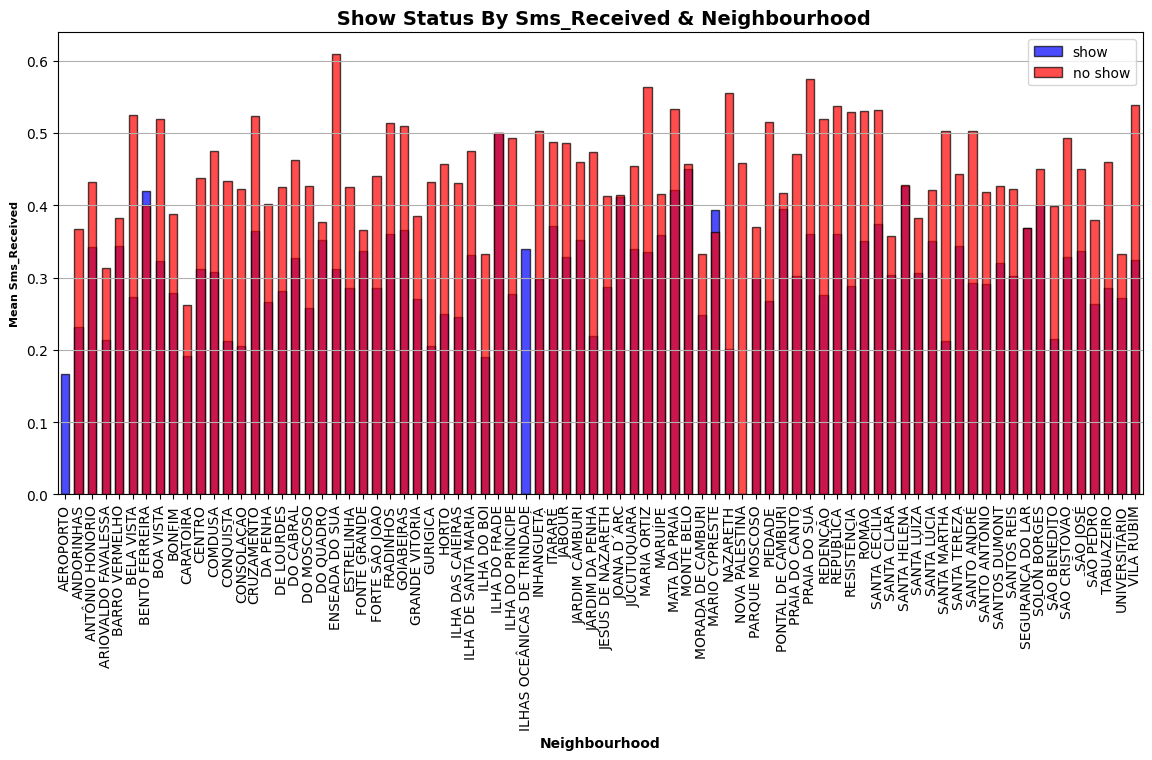

In [116]:
mean_2_factors(p_show, p_no_show, 'Neighbourhood', 'SMS_received')

yes some responses are different. AEROPORTO and ILHAS OCEANICAS DE TRINDADE have the best response, almost everyone who received sms showed up. While NOVA PALESTINA has the worst response, almost everyone who received the sms didn't show up.


Do patients with high ages show up the most in different neighbourhoods?

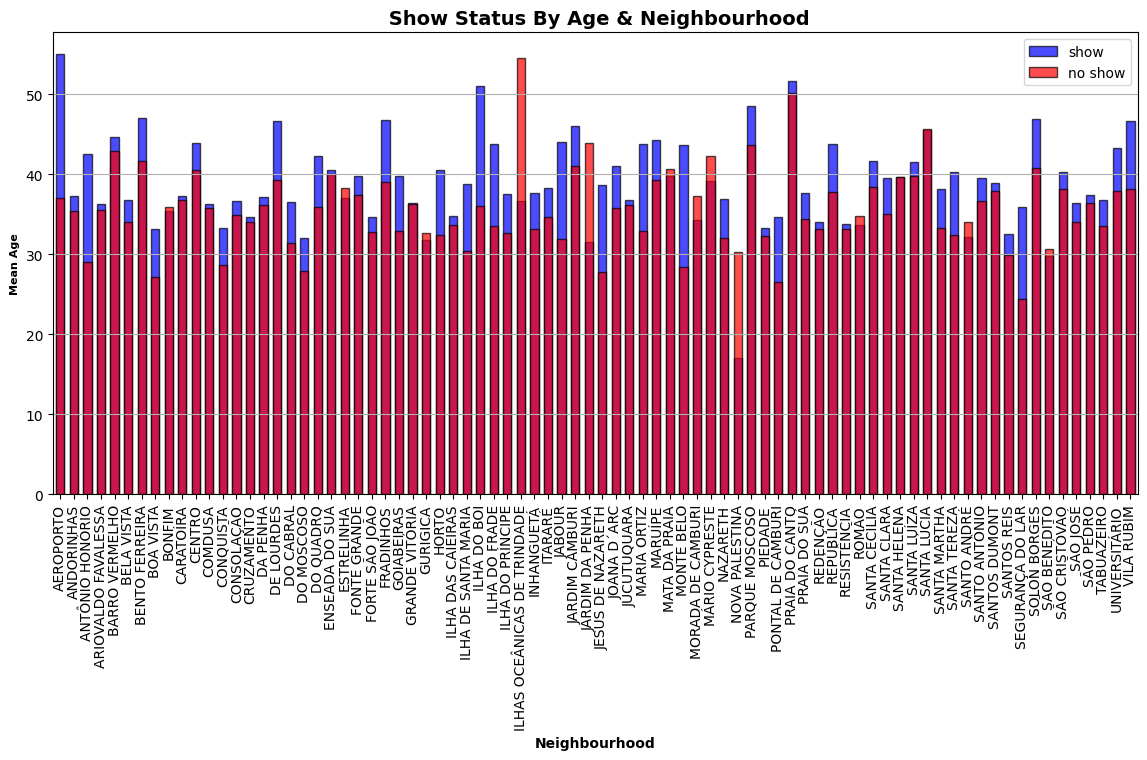

In [117]:
mean_2_factors(p_show, p_no_show, 'Neighbourhood', 'Age')

AEROPORTO has the most attndance when it comes to high ages, while ILHAS OCEANICAS DE TRINDADE has the least attendance when it comes to high ages.

<a id='conclusions'></a>
## Conclusions
Most of the patients are from 1-12 then from aroud 47-58. The least number of patients are above 80 years old. The highest percentage of no show are ages of 115, and lowest are ages of 96. Patients who received SMS and didn't show up are more than patients who didn't receive SMS. SMS service needs to be fixed. AEROPORTO and ILHAS OCEANICAS DE TRINDADE have the best response, almost everyone who received sms showed up. While NOVA PALESTINA has the worst response. patients without Chronic diseases have average age of 35 and most of them don't show up, and patients with diabetes have average age of 60 and most of them don't show up. ILHAS OCEANICAS DE TRINDADE has the highest no show status, while PARQUE INDUSTRIAL has the lowest no show status. AEROPORTO has the most attndance when it comes to older patients, while ILHAS OCEANICAS DE TRINDADE has the least attendance when it comes to older patients. In conclusion, Age and Neibourhood haave the highest effect on the show status.

### Limitations
We have negative results coming from the SMS services, we should check this service and try to fix its problem. We also notice that changes in neighbourhoods can change the results coming from the SMS. We should check the neighbourhood that has positive response to sms and compare its service to the one responsible about the lowest sms responses. Also, we found no clear relationship between the show status and gender, Hypertension, Diabetes, Scholarship, Alchohol or Handcap. We should try collecting different data like Doctors names for each appointment to see who has the highest no show relationship.

###resources
<br>
https://stackoverflow.com/questions/70897794/finding-the-mean-of-nuisance-columns-in-dataframe-error

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html